# Lab5 
## Generalização de Modelos Lineares

## Determinantes Logisticos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.linear_model import LogisticRegression

In [2]:
D = pickle.load(open('binClassData.p', 'rb'))
X1 = D['Xtrain']
y1 = D['trueClassTrain']
X2 = D['Xtest']
y2 = D['trueClassTest']

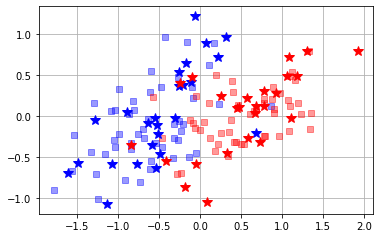

In [3]:
plt.plot(X1[0,y1==0], X1[1, y1==0] , 'sb' , X1[0,y1==1], X1[1,y1==1], 'sr', alpha=.4)
plt.plot(X2[0,y2==0], X2[1, y2==0] , '*b' , X2[0,y2==1], X2[1,y2==1], '*r', ms=10)
plt.axis('scaled')
plt.grid(True)

In [26]:
dl=LogisticRegression(penalty='l2', C=.1, random_state=42, solver='saga').fit(X1.T, y1)
print('Train Score:' , dl.score(X1.T, y1))
print('Test Score :' , dl.score(X2.T, y2))

Train Score: 0.87
Test Score : 0.82


w0 [0.0583961]
w [ 1.28535287 -0.03823838]
x1 [-2  2]
x2 [-65.70125064  68.75556908]


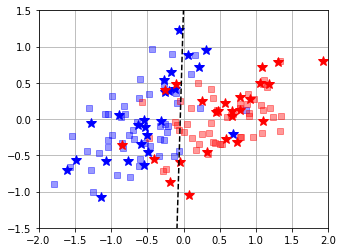

In [27]:
w = dl.coef_.squeeze()
w0 = dl.intercept_
print('w0', w0)
print('w', w)


x1=np.array([-2,2])
x2 = -1/w[1]*(w0+w[0]*x1)
print('x1', x1)
print('x2', x2)

plt.plot(X1[0,y1==0], X1[1, y1==0] , 'sb' , X1[0,y1==1], X1[1,y1==1], 'sr', alpha=.4)
plt.plot(X2[0,y2==0], X2[1, y2==0] , '*b' , X2[0,y2==1], X2[1,y2==1], '*r', ms=10)
plt.plot(x1,x2,'--k')
plt.axis('scaled')
plt.axis([-2,2,-1.5,1.5])
plt.grid(True)

## Classificacao binario : Breast cancer dataset

In [28]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

D = load_breast_cancer()
X = D.data
y = D.target
fN = D.feature_names
print(D.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [44]:
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3)
dl = LogisticRegression(penalty='l2', C=.1, random_state=42, solver='saga', max_iter=5000).fit(X1,y1)
print('Train Score:' , dl.score(X1, y1))
print('Test Score :' , dl.score(X2, y2))

Train Score: 0.9313984168865436
Test Score : 0.9263157894736842


In [45]:
w = dl.coef_
w = w.squeeze()
print(w)

[ 1.76355786e-02 -4.42420620e-03  8.48100309e-02  1.70080374e-02
  7.50504257e-05 -6.18498325e-04 -1.00827412e-03 -3.86988037e-04
  8.90447550e-05  8.65856254e-05  9.11968985e-05  6.59550320e-04
 -2.16690974e-03 -2.91711427e-02  4.62551253e-06 -1.69737592e-04
 -1.86677747e-04 -4.18763297e-05 -1.29430023e-05 -9.85764180e-06
  1.81898785e-02 -1.26748496e-02  6.74593341e-02 -3.01358787e-02
  2.87982200e-05 -2.35881278e-03 -2.96800345e-03 -7.44465876e-04
 -2.57130374e-04 -9.26643641e-05]


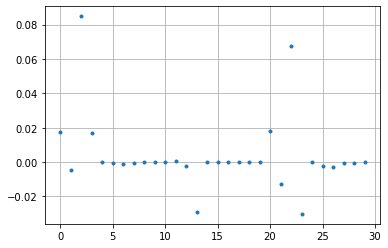

In [46]:
plt.plot(w,'.')
plt.grid(True)

In [47]:
np.sum(w==0)

0

In [48]:
print(fN[w!=0])
print(np.argwhere(w!=0))

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]]


## Classificacao multi-classe

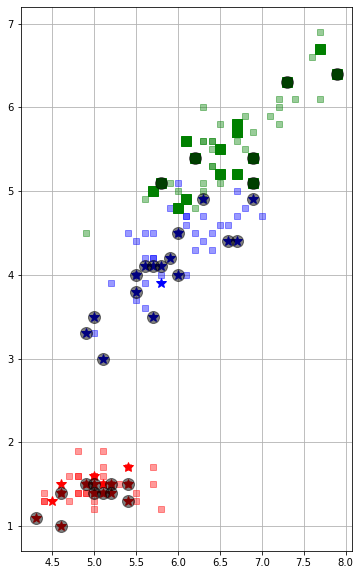

In [70]:
from sklearn.datasets import load_iris

D = load_iris()
X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3)
plt.figure(figsize=(10,10))
plt.plot(X1[y1==0,0], X1[y1==0,2],'sr',X1[y1==1,0],X1[y1==1,2],'sb', X1[y1==2,0],X1[y1==2,2],'sg',alpha=.4)
plt.plot(X2[y2==0,0], X2[y2==0,2],'*r',X2[y2==1,0],X2[y2==1,2],'*b', X2[y2==2,0],X2[y2==2,2],'sg',ms=10)
plt.plot(X2[y2!=y2e,0], X2[y2!=y2e,2],'ok', alpha=.5, ms=12)
plt.axis('scaled')
plt.grid(True)

In [69]:
dl = LogisticRegression(solver='liblinear', C=0.1, penalty='l1').fit(X1,y1)
y2e = dl.predict(X2)
print('Num erros ', np.sum(y2!=y2e))
print(dl.coef_)

Num erros  11
[[ 0.          0.88410399 -1.10921726  0.        ]
 [ 0.         -0.24812029  0.03105666  0.        ]
 [-0.74608945  0.          0.95130808  0.        ]]


In [76]:
dl = LogisticRegression(solver='saga', C=0.1, penalty='l1', multi_class='multinomial', max_iter=1000).fit(X1,y1)
y2e = dl.predict(X2)
print('Num erros ', np.sum(y2!=y2e))
print(dl.coef_)

Num erros  4
[[ 0.          0.         -1.41339648  0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          1.07839543  0.        ]]
